In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel(r"C:\Users\rudra\Documents\BlinkIT Grocery Data.xlsx")
data.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


## Data Cleaning

In [5]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
df=data['Item Fat Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [9]:
data['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## KPI Requirements

## Total Sales,Average sales,Average rating

In [11]:
total_sale=round(data['Sales'].sum())
avg_sale=round(data['Sales'].mean())
item_sold=data['Item Identifier'].count()
avg_rating=round(data['Rating'].mean())
## Display
print("Total sales is:",total_sale)
print("Average sale is:",avg_sale)
print("item sold:",item_sold)
print("average rating is:",avg_rating)

Total sales is: 1201681
Average sale is: 141
item sold: 8523
average rating is: 4


## Total Sales By Fat Content

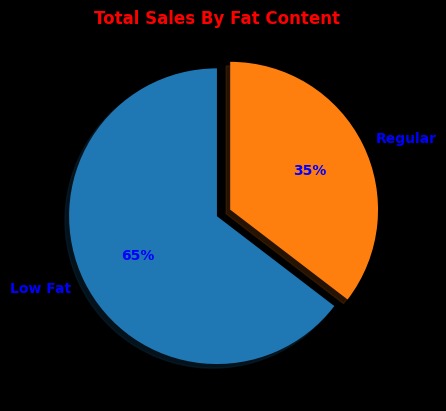

In [13]:
fat_content=data.groupby("Item Fat Content").agg(Total=("Sales","sum")).reset_index()
ex=[0,0.1]
plt.figure(facecolor="k")
plt.pie(fat_content['Total'],labels=fat_content['Item Fat Content'],autopct="%0.0f%%",shadow=True,
       explode=ex,textprops={'color':'b','fontweight':'bold'},startangle=90)
plt.title("Total Sales By Fat Content",color="r",fontweight="bold")
plt.show()

## Total sales By Item type

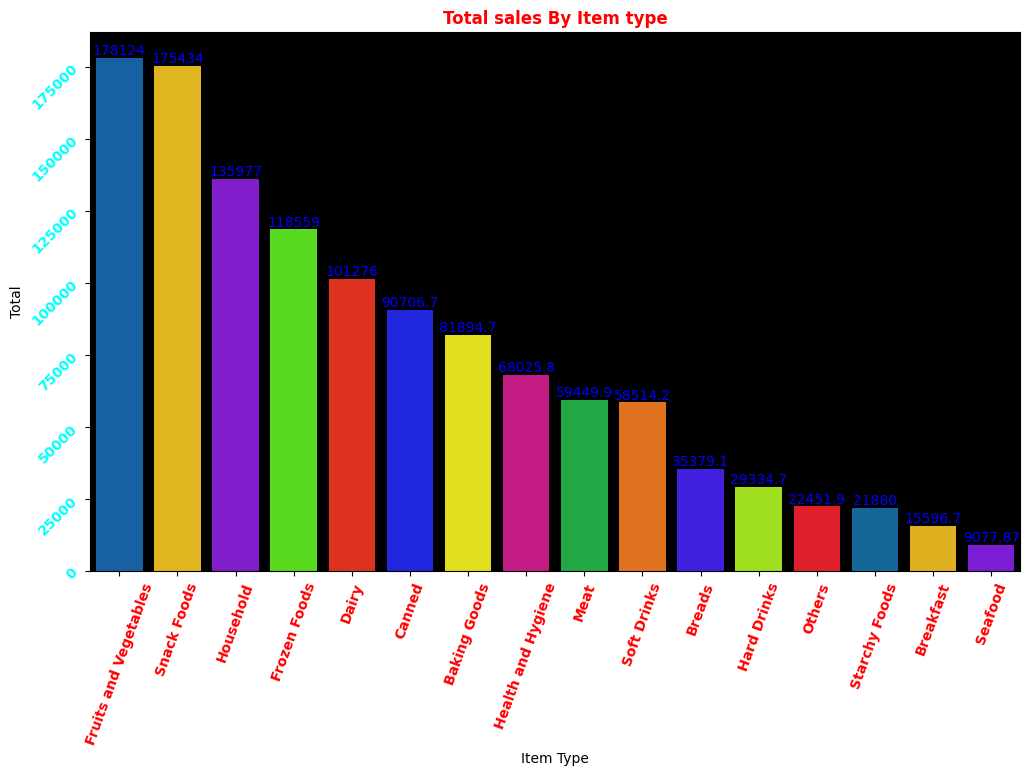

In [15]:
item_type=data.groupby("Item Type").agg(Total=("Sales","sum")).sort_values('Total',ascending=False).reset_index()
plt.figure(figsize=(12,7))
ax=sns.barplot(data=item_type,x='Item Type',y='Total',palette="prism")
for c in ax.containers:
    ax.bar_label(c,color='b')
ax.set_facecolor("k")
plt.xticks(rotation=70,fontweight='bold',color='r')
plt.yticks(rotation=45,fontweight='bold',color='cyan')
plt.title("Total sales By Item type",color='r',fontweight='bold')
plt.show()

## Fat Content By Outlet For Total Sales

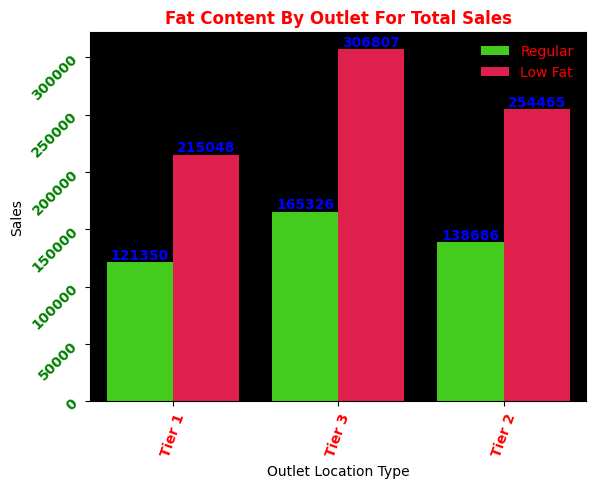

In [17]:
ax=sns.barplot(data=data,x='Outlet Location Type',y='Sales',estimator=sum,hue='Item Fat Content',ci=0,palette='prism',dodge=True)
plt.legend(frameon=False,labelcolor='r')
ax.set_facecolor("k")
for c in ax.containers:
    ax.bar_label(c,color='b',fontweight='bold')
plt.title("Fat Content By Outlet For Total Sales",fontweight='bold',color='r')
plt.xticks(rotation=70,fontweight='bold',color='r')
plt.yticks(rotation=45,fontweight='bold',color='g')
plt.show()

## Total Sales By Outlet Establishment

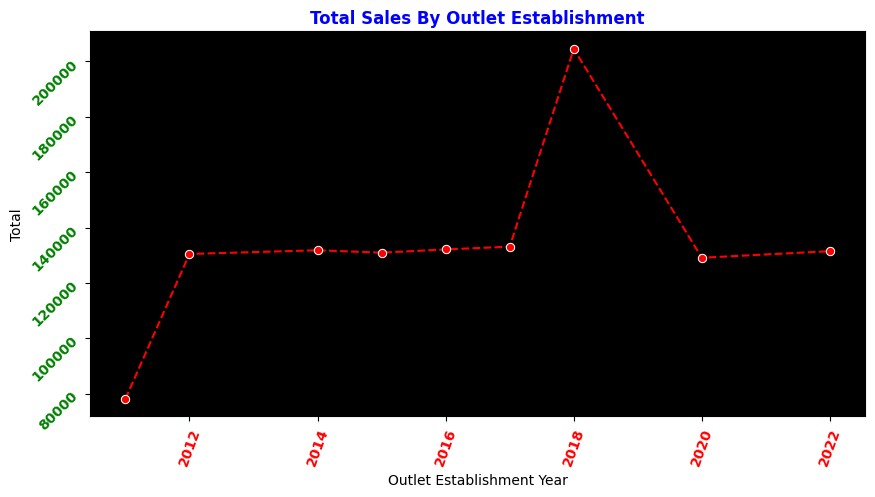

In [19]:
df=data.groupby("Outlet Establishment Year").agg(Total=("Sales","sum")).sort_values('Total',ascending=False).reset_index()
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=df,x='Outlet Establishment Year',y='Total',marker='o',linestyle='--',color='r')
for c in ax.containers:
    ax.bar_label(c,color='b')
ax.set_facecolor("k")
plt.title("Total Sales By Outlet Establishment",color='b',fontweight='bold')
plt.xticks(rotation=70,fontweight='bold',color='r')
plt.yticks(rotation=45,fontweight='bold',color='g')
plt.show()

## Sales By Outlet Size

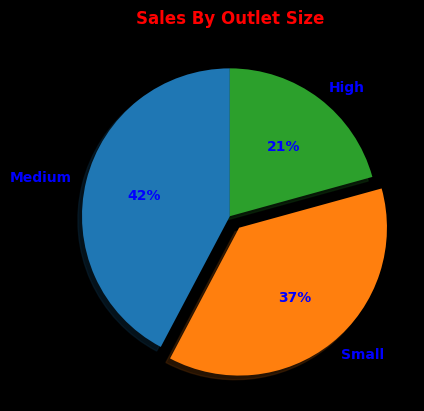

In [198]:
df=data.groupby("Outlet Size").agg(Total=("Sales","sum")).sort_values('Total',ascending=False).reset_index()
plt.figure(facecolor='k')
plt.pie(df['Total'],labels=df['Outlet Size'],autopct="%.0f%%",shadow=True,explode=ex,
       startangle=90,textprops={'color':'b','fontweight':'bold'})
plt.title("Sales By Outlet Size",color='r',fontweight='bold')
plt.show()

## Sales By outlet Location

([0, 1, 2], [Text(0, 0, 'Tier 3'), Text(0, 1, 'Tier 2'), Text(0, 2, 'Tier 1')])

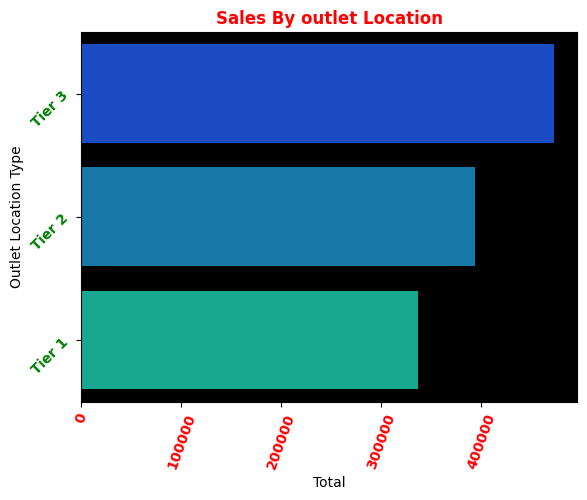

In [217]:
df=data.groupby("Outlet Location Type").agg(Total=("Sales","sum")).sort_values('Total',ascending=False).reset_index()
ax=sns.barplot(data=df,y='Outlet Location Type',x='Total',palette='winter')
ax.set_facecolor("k")
plt.title("Sales By outlet Location",color='r',fontweight='bold')
plt.xticks(rotation=70,fontweight='bold',color='r')
plt.yticks(rotation=45,fontweight='bold',color='g')

## Total Sales By Outlet Type

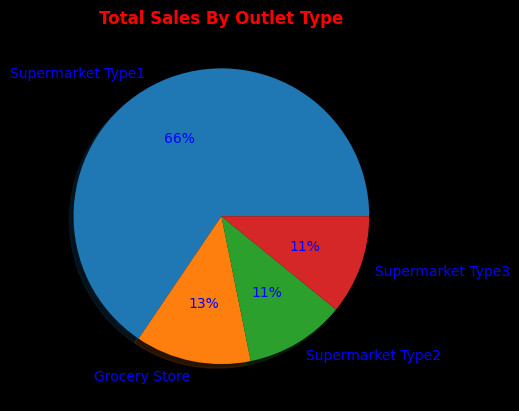

In [236]:
df=data.groupby("Outlet Type").agg(Total=("Sales","sum")).sort_values('Total',ascending=False).reset_index()
plt.figure(facecolor='k')
plt.pie(df['Total'],labels=df['Outlet Type'],autopct="%0.0f%%",shadow=True,textprops={'color':'b'})
plt.title("Total Sales By Outlet Type",color='r',fontweight='bold')
plt.show()